---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
---


# Expected Improvement {#sec-expected-improvement}

This chapter describes, analyzes, and compares different infill criterion. An infill criterion defines how the next point $x_{n+1}$ is selected from the surrogate model $S$. Expected improvement is a popular infill criterion in Bayesian optimization.

## Example: `Spot` and the 1-dim Sphere Function


In [1]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init, surrogate_control_init, design_control_init
import matplotlib.pyplot as plt

Seed set to 123


### The Objective Function: 1-dim Sphere

* The `spotpython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x) = x^2 $$


In [2]:
fun = analytical().fun_sphere

* The size of the `lower` bound vector determines the problem dimension.
* Here we will use `np.array([-1])`, i.e., a one-dim function.

:::{.callout-note}
#### TensorBoard

Similar to the one-dimensional case, which was introduced in Section @sec-visualizing-tensorboard-01, we can use TensorBoard to monitor the progress of the optimization. We will use the same code, only the prefix is different:


In [3]:
from spotpython.utils.init import fun_control_init
PREFIX = "07_Y"
fun_control = fun_control_init(
    PREFIX=PREFIX,
    fun_evals = 25,
    lower = np.array([-1]),
    upper = np.array([1]),
    tolerance_x = np.sqrt(np.spacing(1)),)
design_control = design_control_init(init_size=10)

Seed set to 123


:::


In [4]:
spot_1 = spot.Spot(
            fun=fun,
            fun_control=fun_control,
            design_control=design_control)
spot_1.run()

spotpython tuning: 4.959603317754042e-09 [####------] 44.00% 


spotpython tuning: 4.959603317754042e-09 [#####-----] 48.00% 


spotpython tuning: 4.959603317754042e-09 [#####-----] 52.00% 


spotpython tuning: 4.959603317754042e-09 [######----] 56.00% 


spotpython tuning: 1.7538785665210774e-10 [######----] 60.00% 


spotpython tuning: 5.299979470384224e-12 [######----] 64.00% 


spotpython tuning: 5.299979470384224e-12 [#######---] 68.00% 


spotpython tuning: 5.299979470384224e-12 [#######---] 72.00% 


spotpython tuning: 5.299979470384224e-12 [########--] 76.00% 


spotpython tuning: 5.299979470384224e-12 [########--] 80.00% 


spotpython tuning: 5.299979470384224e-12 [########--] 84.00% 


spotpython tuning: 5.299979470384224e-12 [#########-] 88.00% 


spotpython tuning: 5.299979470384224e-12 [#########-] 92.00% 


spotpython tuning: 5.299979470384224e-12 [##########] 96.00% 


spotpython tuning: 5.299979470384224e-12 [##########] 100.00% Done...



### Results


In [5]:
spot_1.print_results()

min y: 5.299979470384224e-12
x0: 2.302168427892326e-06


[['x0', 2.302168427892326e-06]]

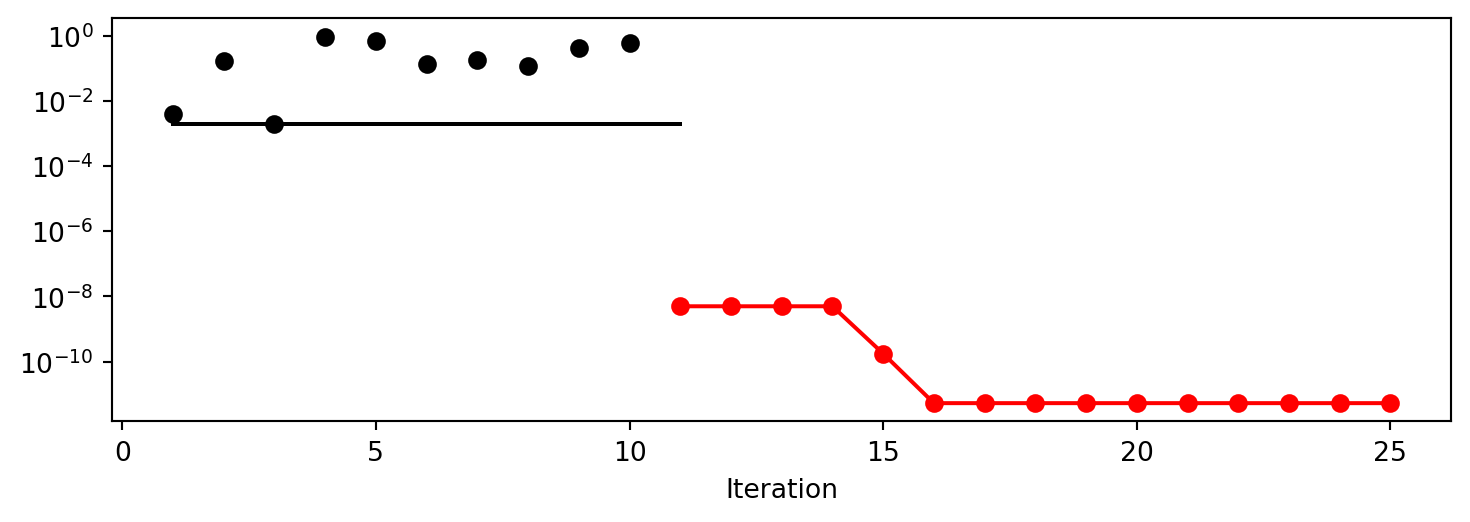

In [6]:
spot_1.plot_progress(log_y=True)

![TensorBoard visualization of the spotpython optimization process and the surrogate model.](figures_static/07_tensorboard_Y.png){width="100%"}

## Same, but with EI as infill_criterion


In [7]:
PREFIX = "07_EI_ISO"
fun_control = fun_control_init(
    PREFIX=PREFIX,
    lower = np.array([-1]),
    upper = np.array([1]),
    fun_evals = 25,
    tolerance_x = np.sqrt(np.spacing(1)),
    infill_criterion = "ei")

Seed set to 123


In [8]:
spot_1_ei = spot.Spot(fun=fun,
                     fun_control=fun_control)
spot_1_ei.run()

spotpython tuning: 7.188987729200596e-08 [####------] 44.00% 


spotpython tuning: 7.188987729200596e-08 [#####-----] 48.00% 


spotpython tuning: 7.188987729200596e-08 [#####-----] 52.00% 


spotpython tuning: 7.188987729200596e-08 [######----] 56.00% 


spotpython tuning: 5.939954122907979e-08 [######----] 60.00% 


spotpython tuning: 1.3947524785731501e-08 [######----] 64.00% 


spotpython tuning: 1.3947524785731501e-08 [#######---] 68.00% 


spotpython tuning: 1.3947524785731501e-08 [#######---] 72.00% 


spotpython tuning: 1.3947524785731501e-08 [########--] 76.00% 


spotpython tuning: 1.3947524785731501e-08 [########--] 80.00% 


spotpython tuning: 4.854409561808151e-10 [########--] 84.00% 


spotpython tuning: 4.854409561808151e-10 [#########-] 88.00% 


spotpython tuning: 2.611463411033466e-11 [#########-] 92.00% 


spotpython tuning: 2.611463411033466e-11 [##########] 96.00% 


spotpython tuning: 2.611463411033466e-11 [##########] 100.00% Done...



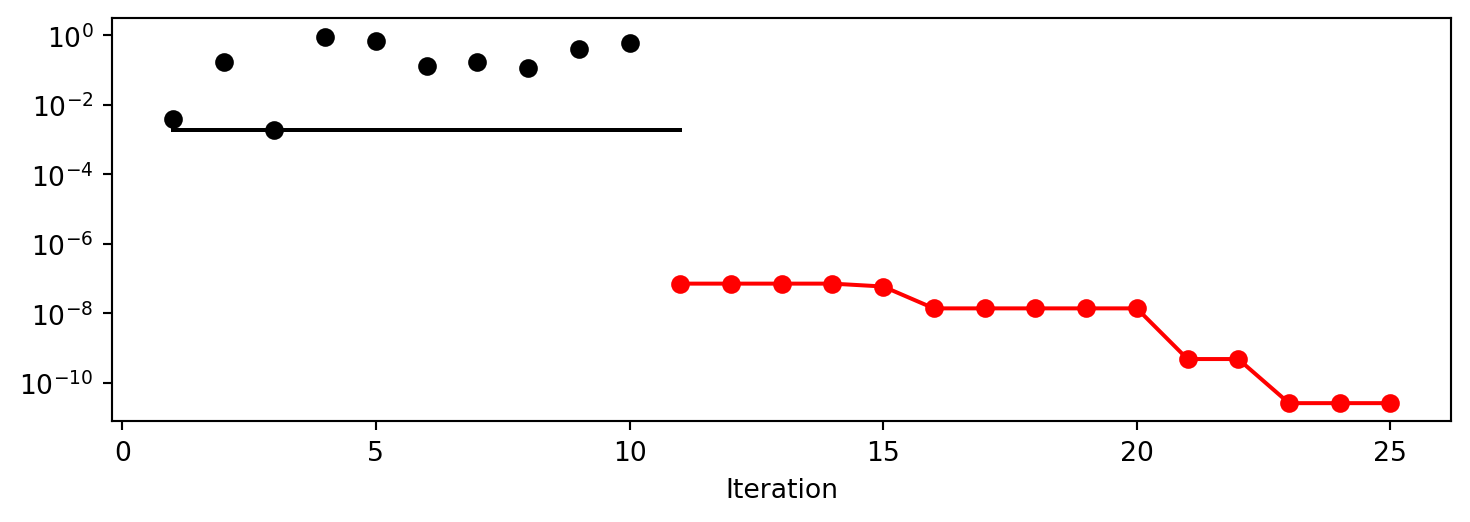

In [9]:
spot_1_ei.plot_progress(log_y=True)

In [10]:
spot_1_ei.print_results()

min y: 2.611463411033466e-11
x0: 5.110247949985857e-06


[['x0', 5.110247949985857e-06]]

![TensorBoard visualization of the spotpython optimization process and the surrogate model. Expected improvement, isotropic Kriging.](figures_static/07_tensorboard_EI_ISO.png){width="100%"}


## Non-isotropic Kriging


In [11]:
PREFIX = "07_EI_NONISO"
fun_control = fun_control_init(
    PREFIX=PREFIX,
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals = 25,
    tolerance_x = np.sqrt(np.spacing(1)),
    infill_criterion = "ei")
surrogate_control = surrogate_control_init(
    n_theta=2,
    noise=False,
    )

Seed set to 123


In [12]:
spot_2_ei_noniso = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)
spot_2_ei_noniso.run()

spotpython tuning: 1.8084153639415482e-05 [####------] 44.00% 


spotpython tuning: 1.8084153639415482e-05 [#####-----] 48.00% 


spotpython tuning: 1.8084153639415482e-05 [#####-----] 52.00% 


spotpython tuning: 1.8084153639415482e-05 [######----] 56.00% 


spotpython tuning: 1.8084153639415482e-05 [######----] 60.00% 


spotpython tuning: 1.8084153639415482e-05 [######----] 64.00% 


spotpython tuning: 1.8084153639415482e-05 [#######---] 68.00% 


spotpython tuning: 1.8084153639415482e-05 [#######---] 72.00% 


spotpython tuning: 1.8084153639415482e-05 [########--] 76.00% 


spotpython tuning: 1.7065306452997463e-05 [########--] 80.00% 


spotpython tuning: 1.7065306452997463e-05 [########--] 84.00% 


spotpython tuning: 7.056740725219606e-06 [#########-] 88.00% 


spotpython tuning: 7.056740725219606e-06 [#########-] 92.00% 


spotpython tuning: 7.056740725219606e-06 [##########] 96.00% 


spotpython tuning: 7.056740725219606e-06 [##########] 100.00% Done...



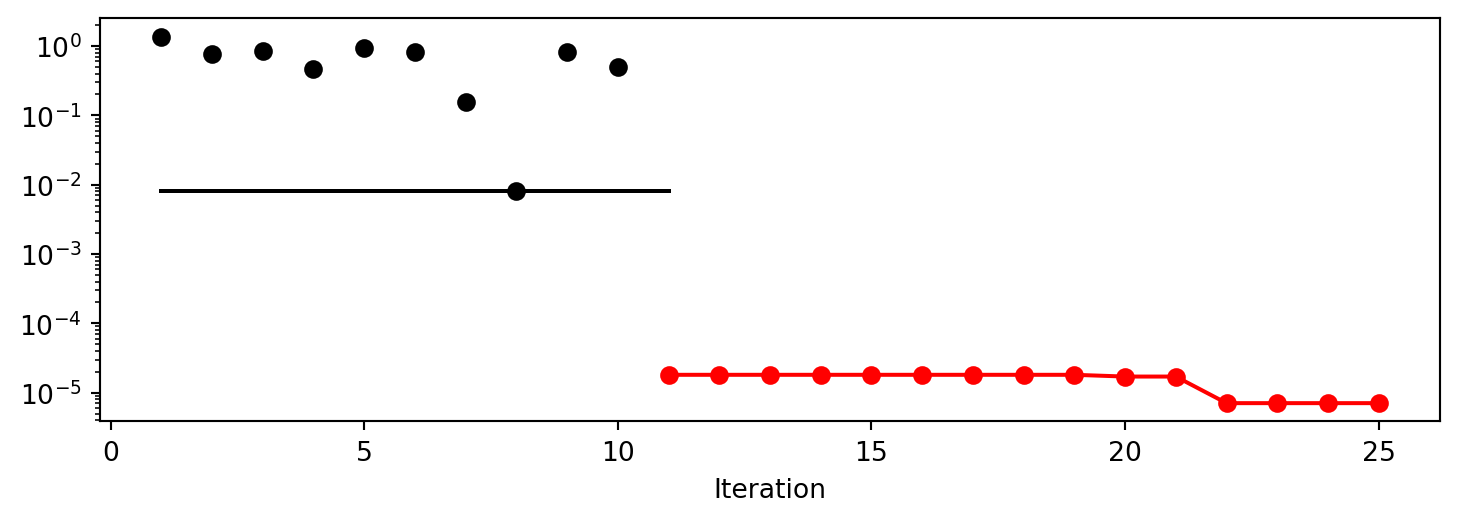

In [13]:
spot_2_ei_noniso.plot_progress(log_y=True)

In [14]:
spot_2_ei_noniso.print_results()

min y: 7.056740725219606e-06
x0: -0.0025062845492088196
x1: -0.0008804989969425007


[['x0', -0.0025062845492088196], ['x1', -0.0008804989969425007]]

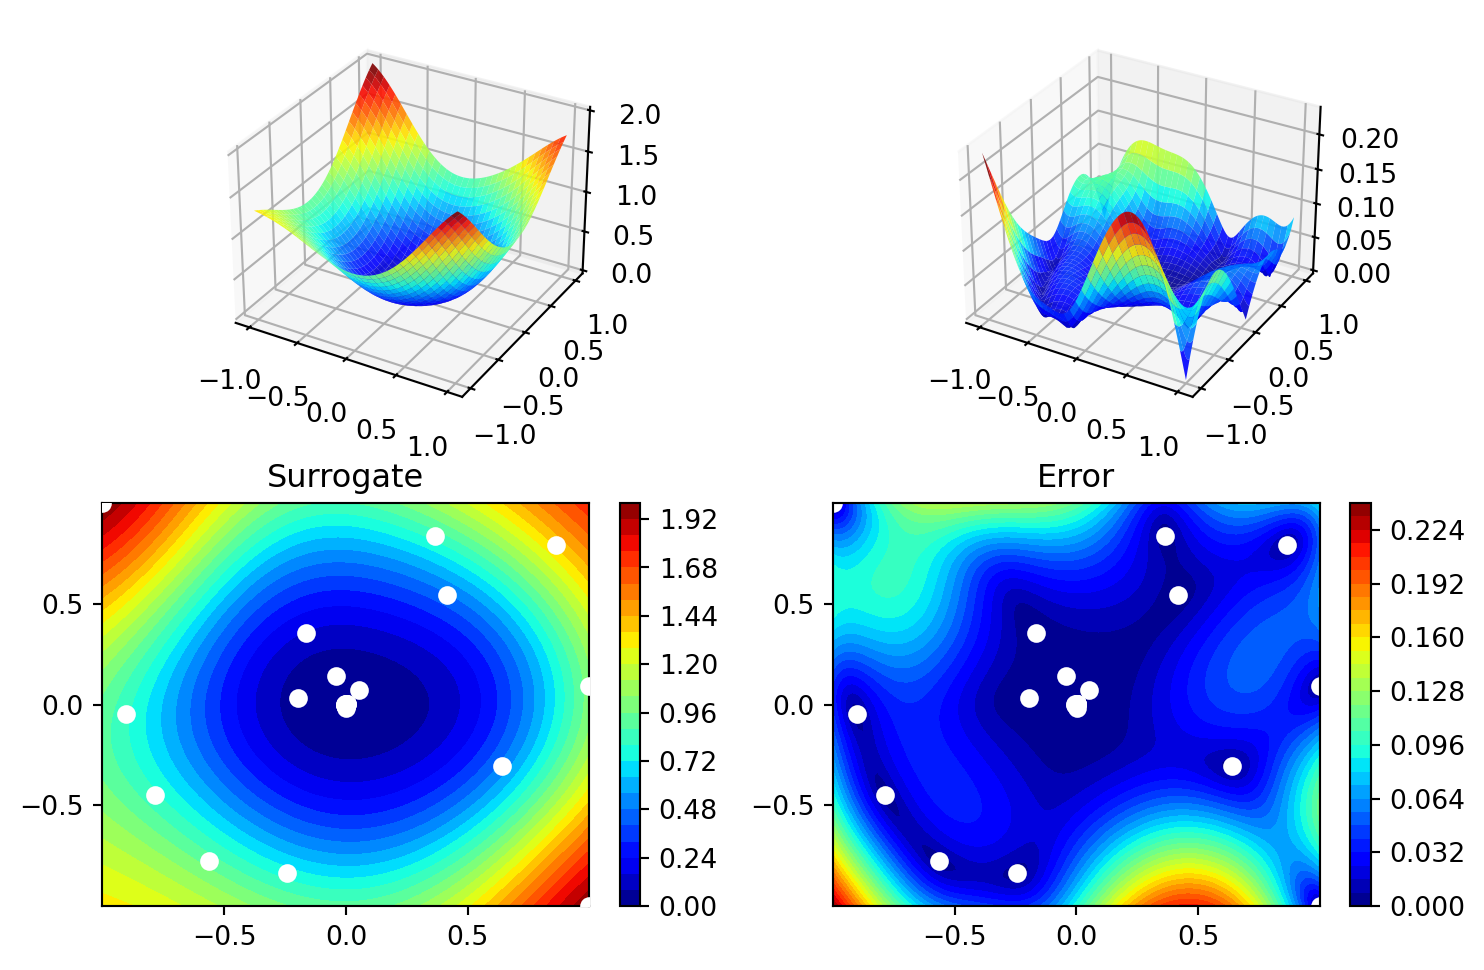

In [15]:
spot_2_ei_noniso.surrogate.plot()

![TensorBoard visualization of the spotpython optimization process and the surrogate model. Expected improvement, isotropic Kriging.](figures_static/07_tensorboard_EI_NONISO.png){width="100%"}


## Using `sklearn` Surrogates

### The spot Loop

The `spot` loop consists of the following steps:

1. Init: Build initial design $X$
2. Evaluate initial design on real objective $f$: $y = f(X)$
3. Build surrogate: $S = S(X,y)$
4. Optimize on surrogate: $X_0 =  \text{optimize}(S)$
5. Evaluate on real objective: $y_0 = f(X_0)$
6. Impute (Infill) new points: $X = X \cup X_0$, $y = y \cup y_0$.
7. Got 3.

The `spot` loop is implemented in `R` as follows:

![Visual representation of the model based search with SPOT. Taken from: Bartz-Beielstein, T., and Zaefferer, M. Hyperparameter tuning approaches. In Hyperparameter Tuning for Machine and Deep Learning with R - A Practical Guide, E. Bartz, T. Bartz-Beielstein, M. Zaefferer, and O. Mersmann, Eds. Springer, 2022, ch. 4, pp. 67–114. ](figures_static/spotModel.png)

### spot: The Initial Model

#### Example: Modifying the initial design size

This is the "Example: Modifying the initial design size"  from Chapter 4.5.1 in [bart21i].


In [16]:
spot_ei = spot.Spot(fun=fun,
                fun_control=fun_control_init(
                lower = np.array([-1,-1]),
                upper= np.array([1,1])), 
                design_control = design_control_init(init_size=5))
spot_ei.run()

Seed set to 123


spotpython tuning: 0.13771720111978272 [####------] 40.00% 


spotpython tuning: 0.008762260544617942 [#####-----] 46.67% 


spotpython tuning: 0.0028383641218116835 [#####-----] 53.33% 


spotpython tuning: 0.0008109493206433335 [######----] 60.00% 


spotpython tuning: 0.0003652470205973824 [#######---] 66.67% 


spotpython tuning: 0.00036032551596159646 [#######---] 73.33% 


spotpython tuning: 0.00035888041070709844 [########--] 80.00% 


spotpython tuning: 0.00032677794812133767 [#########-] 86.67% 


spotpython tuning: 0.0002726988496483528 [#########-] 93.33% 


spotpython tuning: 0.00015304178060680248 [##########] 100.00% Done...



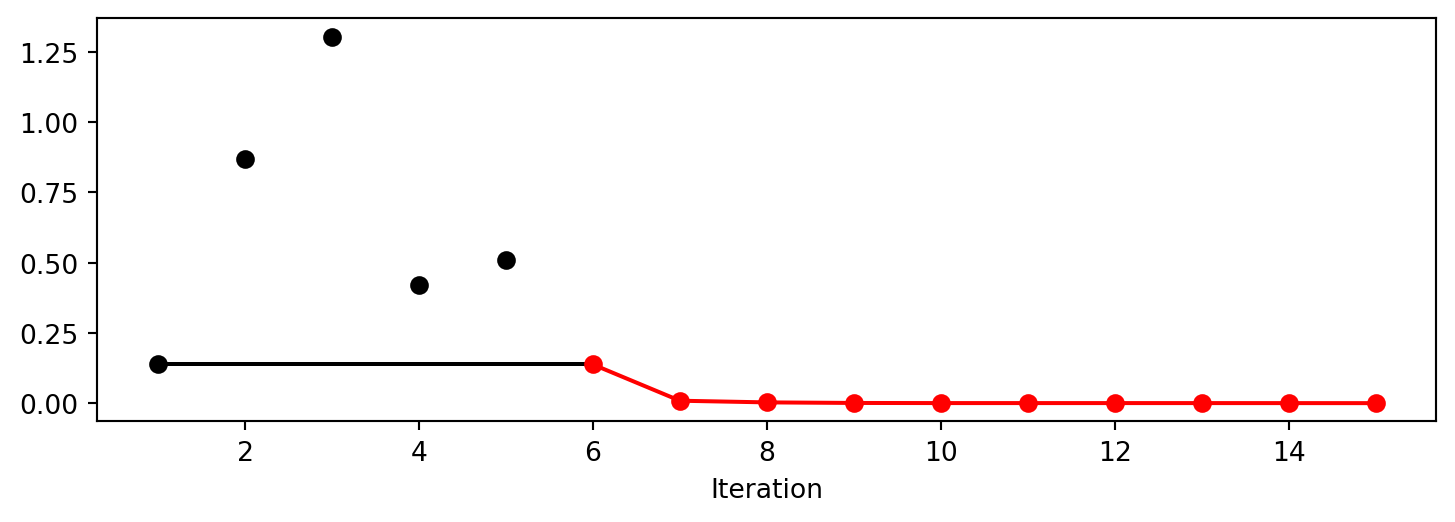

In [17]:
spot_ei.plot_progress()

In [18]:
np.min(spot_1.y), np.min(spot_ei.y)

(5.299979470384224e-12, 0.00015304178060680248)

### Init: Build Initial Design


In [19]:
from spotpython.design.spacefilling import SpaceFilling
from spotpython.build.kriging import Kriging
from spotpython.fun.objectivefunctions import analytical
gen = SpaceFilling(2)
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical().fun_branin

X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)

[[ 8.97647221 13.41926847]
 [ 0.66946019  1.22344228]
 [ 5.23614115 13.78185824]
 [ 5.6149825  11.5851384 ]
 [-1.72963184  1.66516096]
 [-4.26945568  7.1325531 ]
 [ 1.26363761 10.17935555]
 [ 2.88779942  8.05508969]
 [-3.39111089  4.15213772]
 [ 7.30131231  5.22275244]]
[128.95676449  31.73474356 172.89678121 126.71295908  64.34349975
  70.16178611  48.71407916  31.77322887  76.91788181  30.69410529]


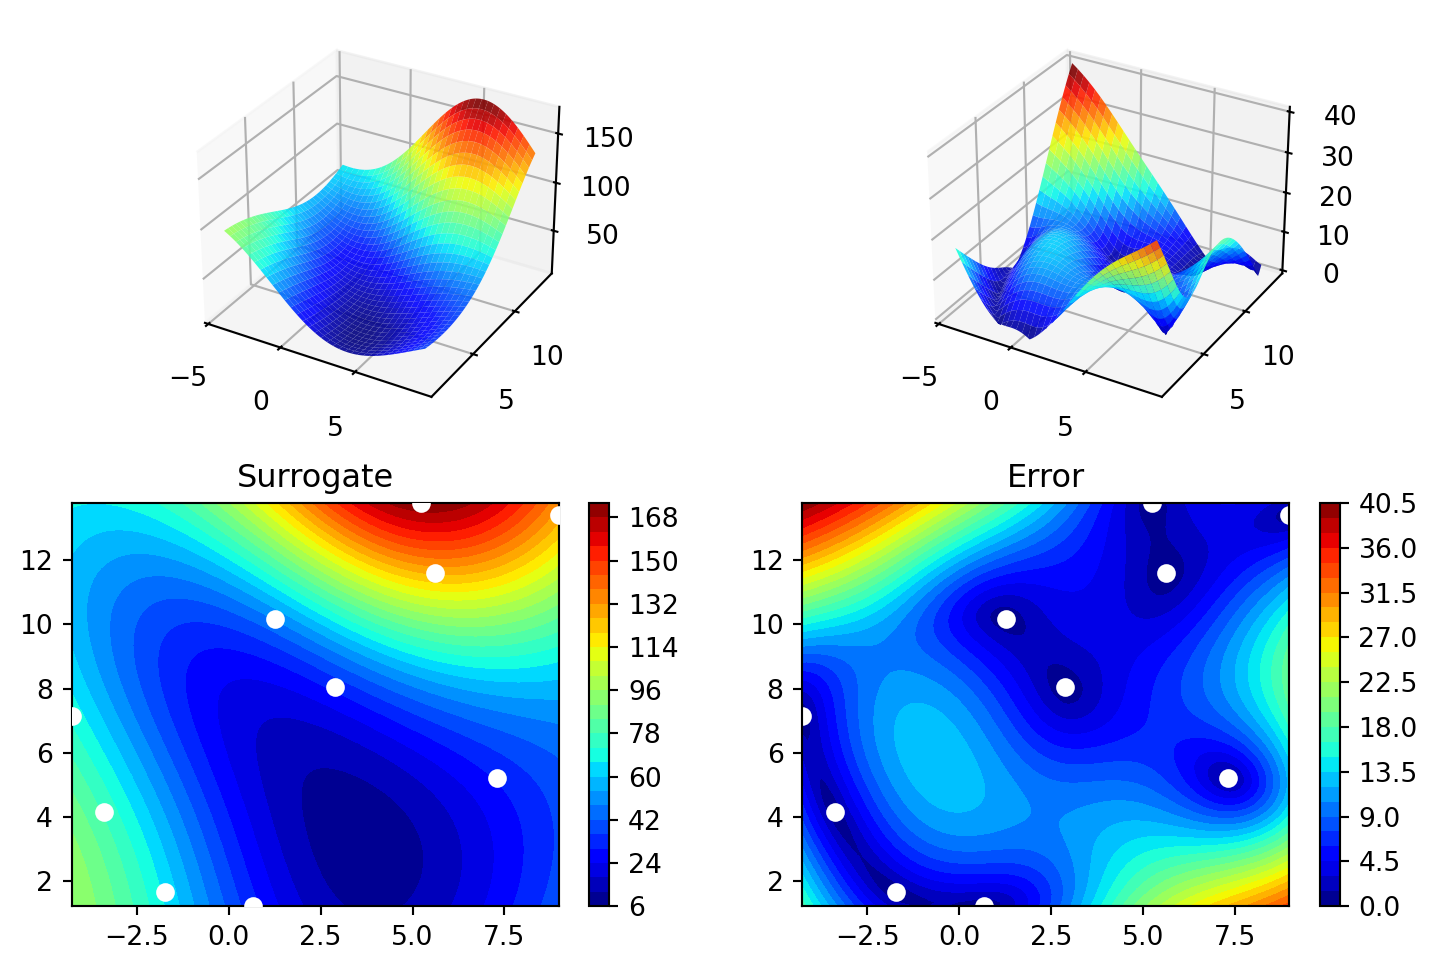

In [20]:
S = Kriging(name='kriging',  seed=123)
S.fit(X, y)
S.plot()

In [21]:
gen = SpaceFilling(2, seed=123)
X0 = gen.scipy_lhd(3)
gen = SpaceFilling(2, seed=345)
X1 = gen.scipy_lhd(3)
X2 = gen.scipy_lhd(3)
gen = SpaceFilling(2, seed=123)
X3 = gen.scipy_lhd(3)
X0, X1, X2, X3

(array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]),
 array([[0.78373509, 0.86811887],
        [0.06692621, 0.6058029 ],
        [0.41374778, 0.00525456]]),
 array([[0.121357  , 0.69043832],
        [0.41906219, 0.32838498],
        [0.86742658, 0.52910374]]),
 array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]))

### Evaluate 

###  Build Surrogate

### A Simple Predictor

The code below shows how to use a simple model for prediction.

* Assume that only two (very costly) measurements are available:
  
  1. f(0) = 0.5
  2. f(2) = 2.5

* We are interested in the value at $x_0 = 1$, i.e., $f(x_0 = 1)$, but cannot run an additional, third experiment.


In [22]:
from sklearn import linear_model
X = np.array([[0], [2]])
y = np.array([0.5, 2.5])
S_lm = linear_model.LinearRegression()
S_lm = S_lm.fit(X, y)
X0 = np.array([[1]])
y0 = S_lm.predict(X0)
print(y0)

[1.5]


* Central Idea:
  * Evaluation of the surrogate model `S_lm` is much cheaper (or / and much faster) than running the real-world experiment $f$.

## Gaussian Processes regression: basic introductory example

This example was taken from [scikit-learn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html). After fitting our model, we see that the hyperparameters of the kernel have been optimized. Now, we will use our kernel to compute the mean prediction of the full dataset and plot the 95% confidence interval.


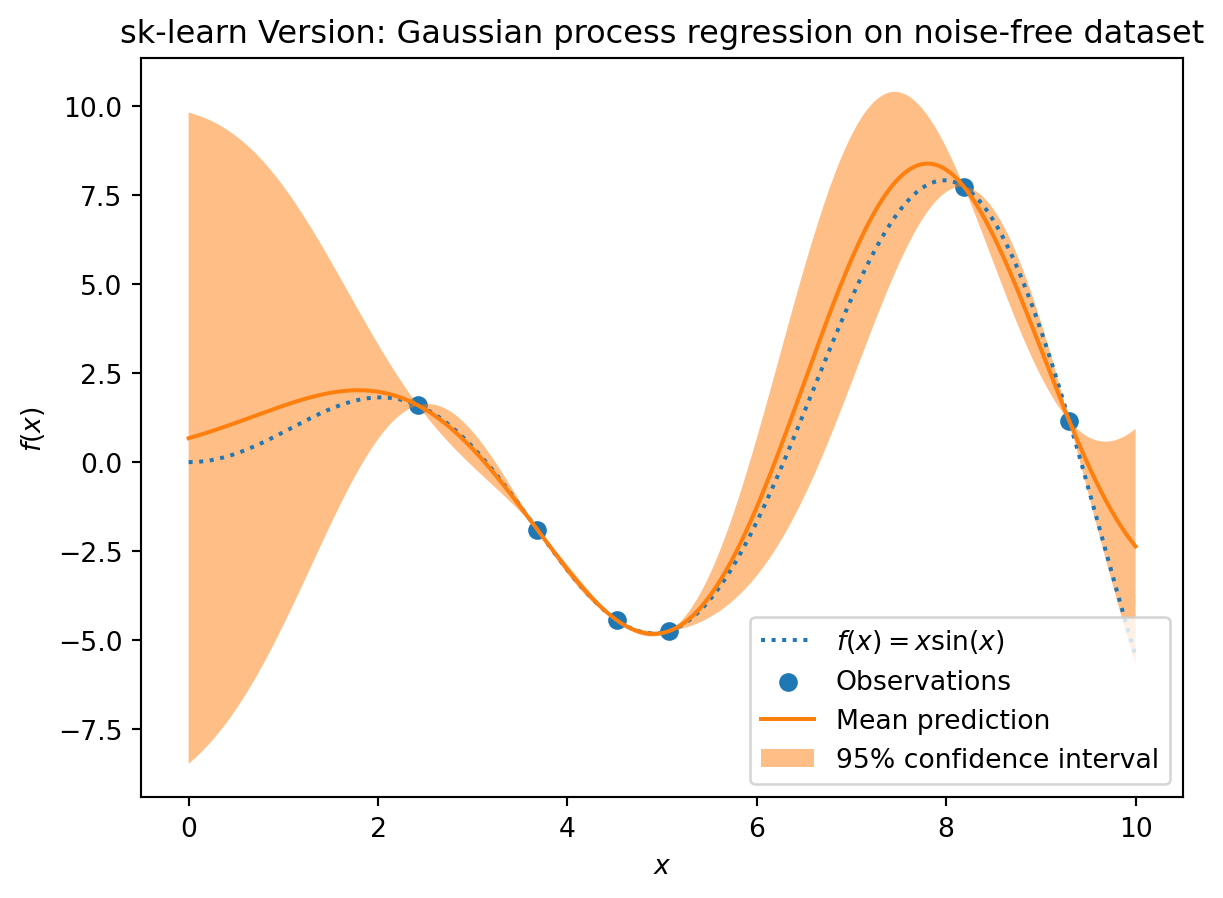

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("sk-learn Version: Gaussian process regression on noise-free dataset")

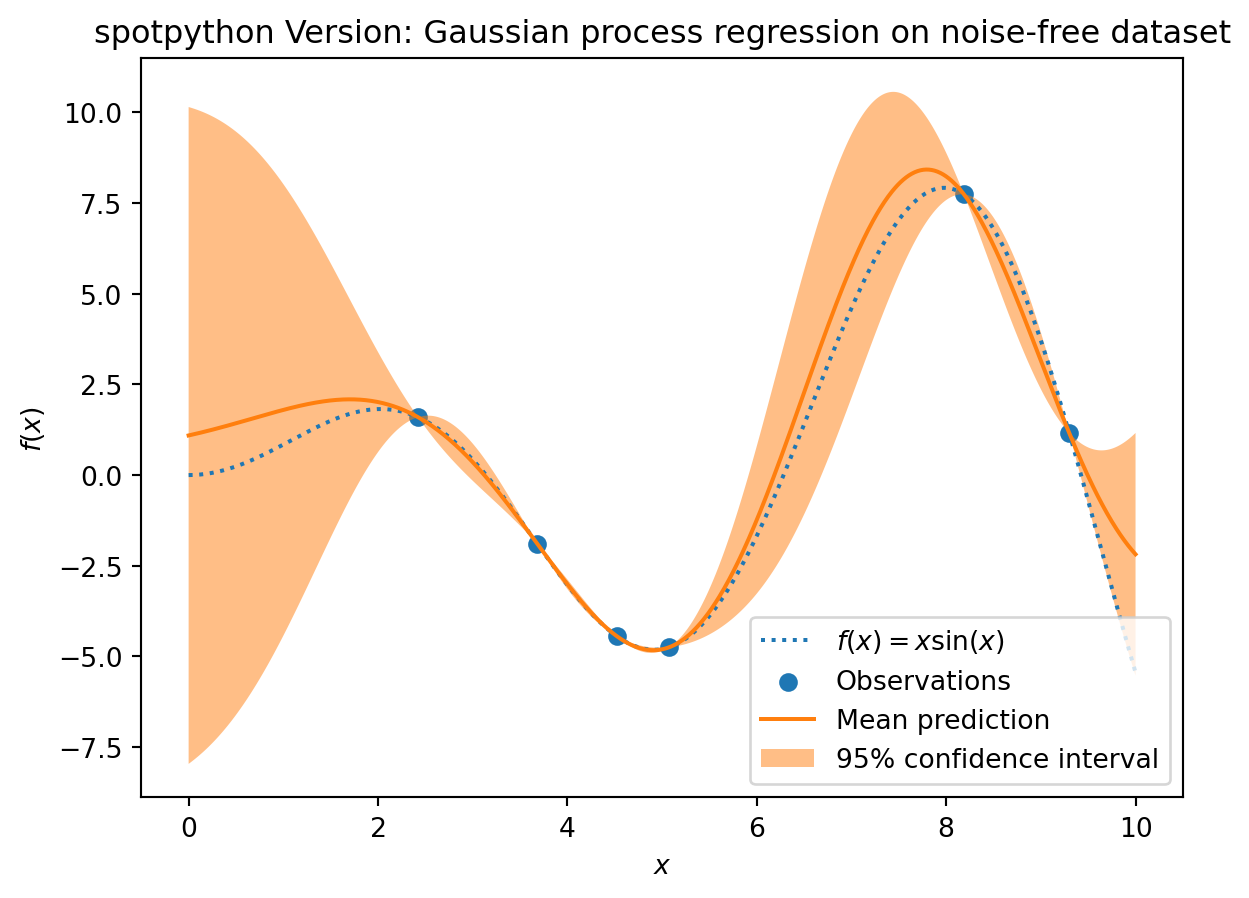

In [24]:
from spotpython.build.kriging import Kriging
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]


S = Kriging(name='kriging',  seed=123, log_level=50, cod_type="norm")
S.fit(X_train, y_train)

mean_prediction, std_prediction, ei = S.predict(X, return_val="all")

std_prediction

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("spotpython Version: Gaussian process regression on noise-free dataset")

## The Surrogate: Using scikit-learn models

Default is the internal `kriging` surrogate.


In [25]:
S_0 = Kriging(name='kriging', seed=123)

Models from `scikit-learn` can be selected, e.g., Gaussian Process:


In [26]:
# Needed for the sklearn surrogates:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import tree
import pandas as pd

In [27]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

* and many more:


In [28]:
S_Tree = DecisionTreeRegressor(random_state=0)
S_LM = linear_model.LinearRegression()
S_Ridge = linear_model.Ridge()
S_RF = RandomForestRegressor(max_depth=2, random_state=0) 

* The scikit-learn GP model `S_GP` is selected.


In [29]:
S = S_GP

In [30]:
isinstance(S, GaussianProcessRegressor)


True

In [31]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical().fun_branin
fun_control = fun_control_init(
    lower = np.array([-5,-0]),
    upper = np.array([10,15]),
    fun_evals = 15)    
design_control = design_control_init(init_size=5)
spot_GP = spot.Spot(fun=fun, 
                    fun_control=fun_control,
                    surrogate=S, 
                    design_control=design_control)
spot_GP.run()

Seed set to 123


spotpython tuning: 24.51465459019188 [####------] 40.00% 


spotpython tuning: 11.003101704408273 [#####-----] 46.67% 


spotpython tuning: 11.003101704408273 [#####-----] 53.33% 


spotpython tuning: 7.281515308693262 [######----] 60.00% 


spotpython tuning: 7.281515308693262 [#######---] 66.67% 


spotpython tuning: 7.281515308693262 [#######---] 73.33% 


spotpython tuning: 2.9519942803779493 [########--] 80.00% 


spotpython tuning: 2.9519942803779493 [#########-] 86.67% 


spotpython tuning: 2.1049767654946914 [#########-] 93.33% 


spotpython tuning: 1.9431498675678949 [##########] 100.00% Done...



/Users/bartz/miniforge3/envs/spot312/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [32]:
spot_GP.y

array([ 69.32459936, 152.38491454, 107.92560483,  24.51465459,
        76.73500031,  86.30429136,  11.0031017 ,  16.11757292,
         7.28151531,  21.82295775,  10.96088904,   2.95199428,
         3.0290972 ,   2.10497677,   1.94314987])

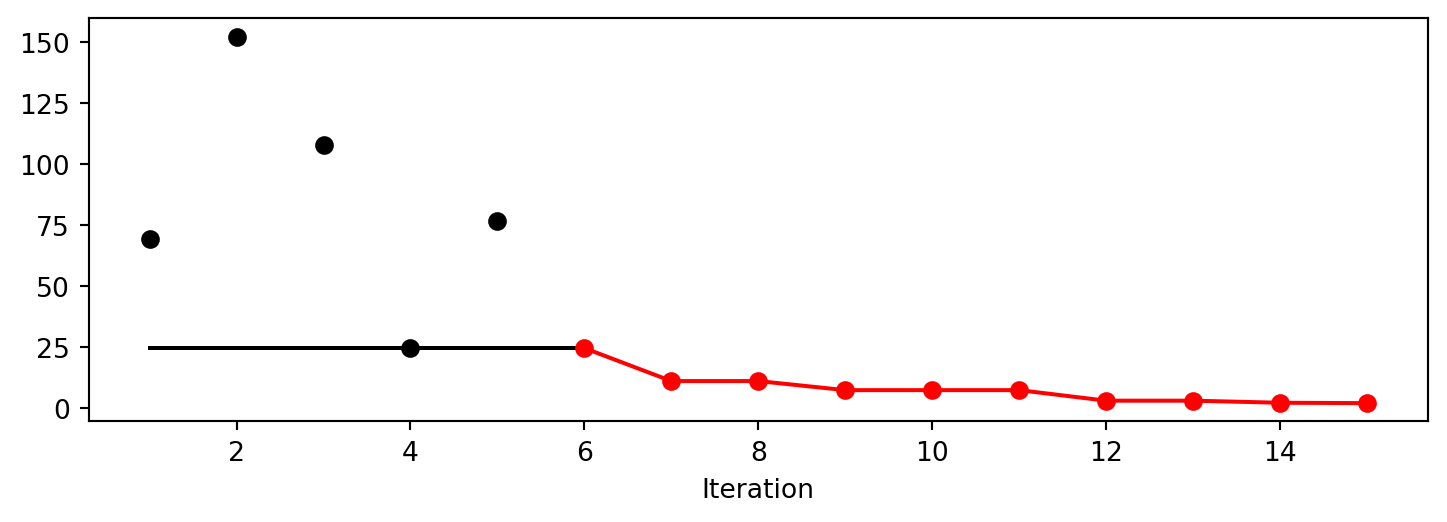

In [33]:
spot_GP.plot_progress()

In [34]:
spot_GP.print_results()

min y: 1.9431498675678949
x0: 10.0
x1: 2.9999226833344648


[['x0', 10.0], ['x1', 2.9999226833344648]]

## Additional Examples


In [35]:
# Needed for the sklearn surrogates:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import tree
import pandas as pd

In [36]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [37]:
from spotpython.build.kriging import Kriging
import numpy as np
import spotpython
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot

S_K = Kriging(name='kriging',
              seed=123,
              log_level=50,
              infill_criterion = "y",
              n_theta=1,
              noise=False,
              cod_type="norm")
fun = analytical().fun_sphere

fun_control = fun_control_init(
    lower = np.array([-1,-1]),
    upper = np.array([1,1]),
    fun_evals = 25)

spot_S_K = spot.Spot(fun=fun,
                     fun_control=fun_control,
                     surrogate=S_K,
                     design_control=design_control,
                     surrogate_control=surrogate_control)
spot_S_K.run()

Seed set to 123


spotpython tuning: 0.13771716844457255 [##--------] 24.00% 


spotpython tuning: 0.008763992988881779 [###-------] 28.00% 


spotpython tuning: 0.0028324931031249094 [###-------] 32.00% 


spotpython tuning: 0.0008161627041911008 [####------] 36.00% 


spotpython tuning: 0.00036337249944152984 [####------] 40.00% 


spotpython tuning: 0.0003620634598515755 [####------] 44.00% 


spotpython tuning: 0.00036019126988579237 [#####-----] 48.00% 


spotpython tuning: 0.0003310003348891555 [#####-----] 52.00% 


spotpython tuning: 0.0002796810486585005 [######----] 56.00% 


spotpython tuning: 0.00016668209586740844 [######----] 60.00% 


spotpython tuning: 2.105184213458755e-05 [######----] 64.00% 


spotpython tuning: 2.33449020805854e-06 [#######---] 68.00% 


spotpython tuning: 7.112087478830758e-07 [#######---] 72.00% 


spotpython tuning: 4.3581016990329405e-07 [########--] 76.00% 


spotpython tuning: 3.9965568597157324e-07 [########--] 80.00% 


spotpython tuning: 1.9740797347254742e-07 [########--] 84.00% 


spotpython tuning: 1.6627705746993065e-07 [#########-] 88.00% 


spotpython tuning: 1.6627705746993065e-07 [#########-] 92.00% 


spotpython tuning: 1.6627705746993065e-07 [##########] 96.00% 


spotpython tuning: 1.6627705746993065e-07 [##########] 100.00% Done...



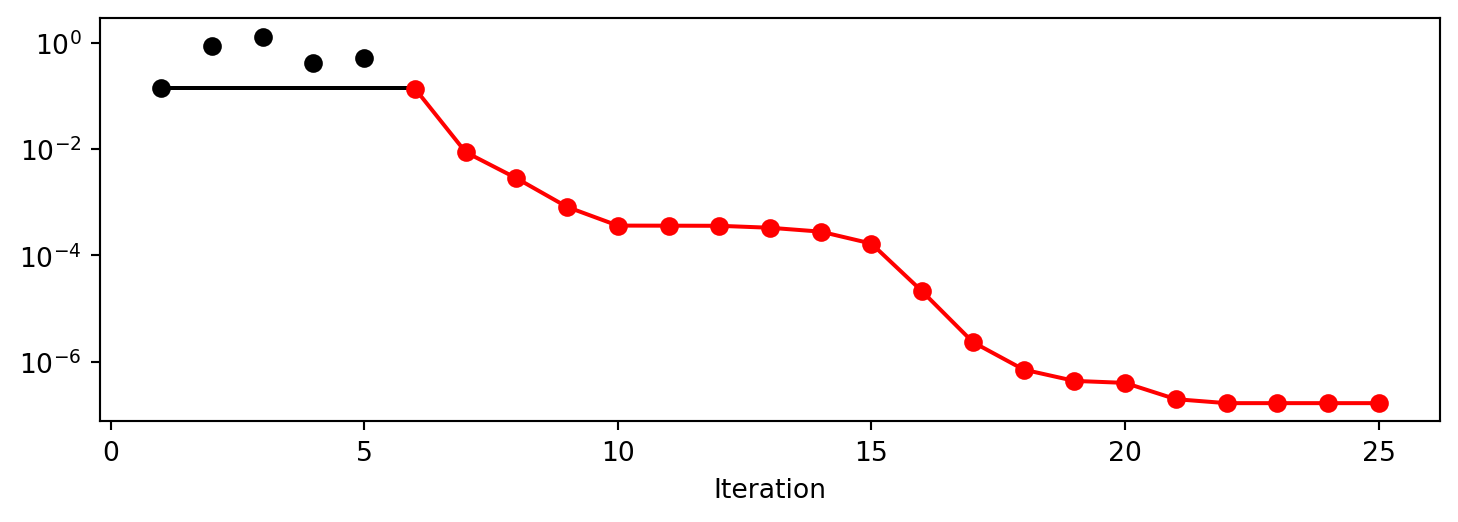

In [38]:
spot_S_K.plot_progress(log_y=True)

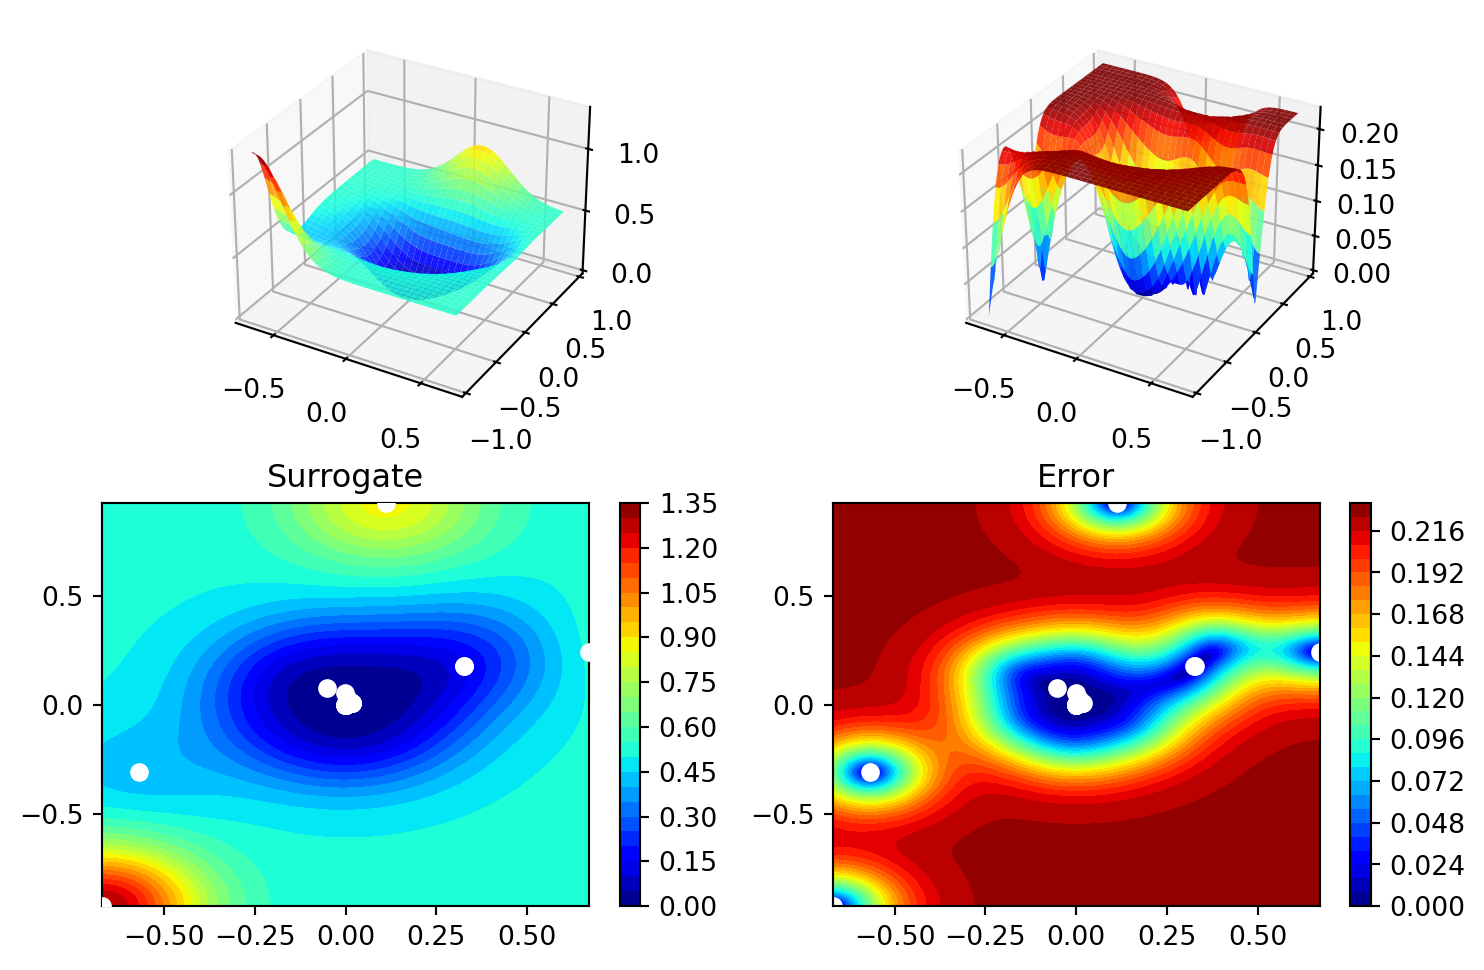

In [39]:
spot_S_K.surrogate.plot()

In [40]:
spot_S_K.print_results()

min y: 1.6627705746993065e-07
x0: 0.0003245075243596407
x1: 0.00024692493617273215


[['x0', 0.0003245075243596407], ['x1', 0.00024692493617273215]]

### Optimize on Surrogate

### Evaluate on Real Objective

### Impute / Infill new Points

## Tests


In [41]:
import numpy as np
from spotpython.spot import spot
from spotpython.fun.objectivefunctions import analytical

fun_sphere = analytical().fun_sphere

fun_control = fun_control_init(
                    lower=np.array([-1, -1]),
                    upper=np.array([1, 1]),
                    n_points = 2)
spot_1 = spot.Spot(
    fun=fun_sphere,
    fun_control=fun_control,
)

# (S-2) Initial Design:
spot_1.X = spot_1.design.scipy_lhd(
    spot_1.design_control["init_size"], lower=spot_1.lower, upper=spot_1.upper
)
print(spot_1.X)

# (S-3): Eval initial design:
spot_1.y = spot_1.fun(spot_1.X)
print(spot_1.y)

spot_1.fit_surrogate()
X0 = spot_1.suggest_new_X()
print(X0)
assert X0.size == spot_1.n_points * spot_1.k

Seed set to 123


[[ 0.86352963  0.7892358 ]
 [-0.24407197 -0.83687436]
 [ 0.36481882  0.8375811 ]
 [ 0.415331    0.54468512]
 [-0.56395091 -0.77797854]
 [-0.90259409 -0.04899292]
 [-0.16484832  0.35724741]
 [ 0.05170659  0.07401196]
 [-0.78548145 -0.44638164]
 [ 0.64017497 -0.30363301]]
[1.36857656 0.75992983 0.83463487 0.46918172 0.92329124 0.8170764
 0.15480068 0.00815134 0.81623768 0.502017  ]
[[0.00163775 0.00441483]
 [0.00163816 0.00398502]]


## EI: The Famous Schonlau Example


In [42]:
X_train0 = np.array([1, 2, 3, 4, 12]).reshape(-1,1)
X_train = np.linspace(start=0, stop=10, num=5).reshape(-1, 1)

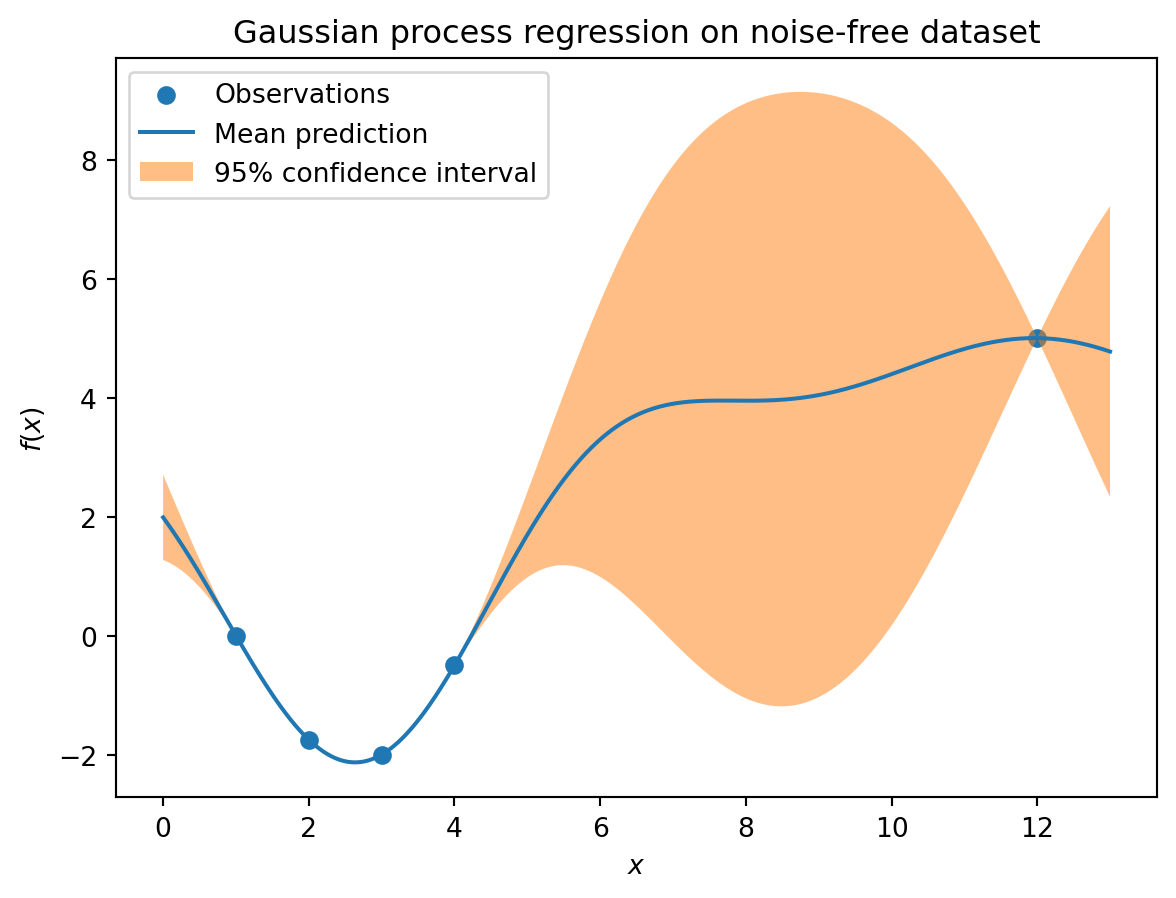

In [43]:
from spotpython.build.kriging import Kriging
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([1., 2., 3., 4., 12.]).reshape(-1,1)
y_train = np.array([0., -1.75, -2, -0.5, 5.])

S = Kriging(name='kriging',  seed=123, log_level=50, n_theta=1, noise=False, cod_type="norm")
S.fit(X_train, y_train)

X = np.linspace(start=0, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
if True:
    plt.fill_between(
        X.ravel(),
        mean_prediction - 2 * std_prediction,
        mean_prediction + 2 * std_prediction,
        alpha=0.5,
        label=r"95% confidence interval",
    )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

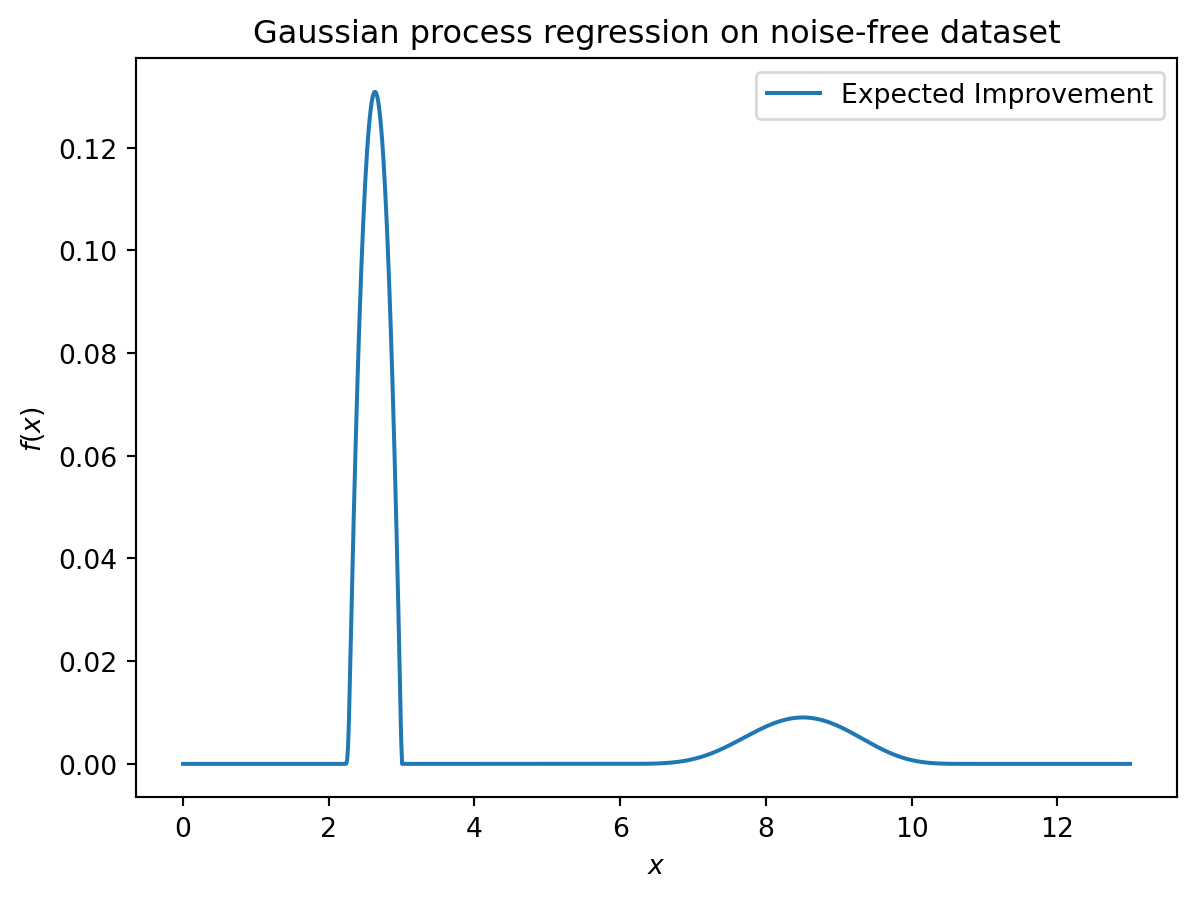

In [44]:
#plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
# plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, -ei, label="Expected Improvement")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [45]:
S.log

{'negLnLike': array([1.20788205]),
 'theta': array([-0.99002505]),
 'p': [],
 'Lambda': []}

## EI: The Forrester Example


Seed set to 123


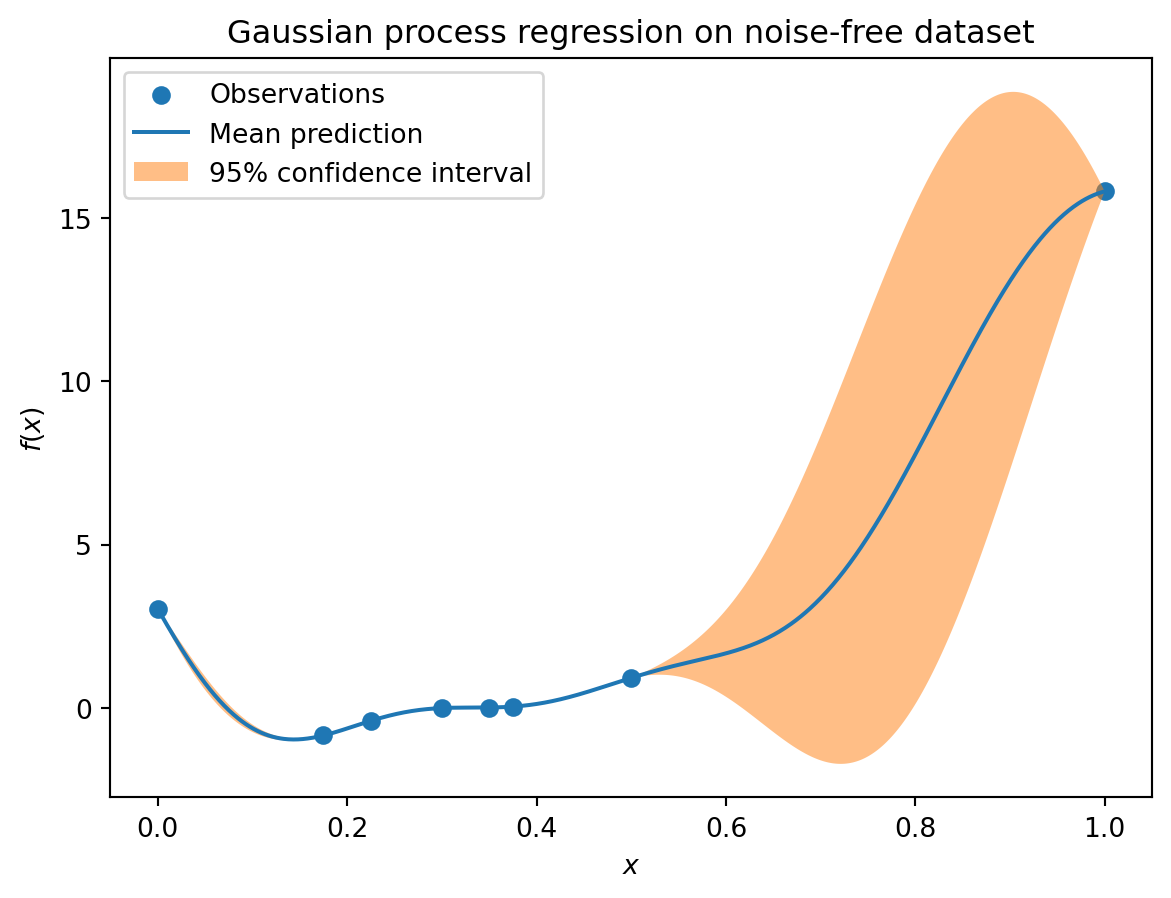

In [46]:
from spotpython.build.kriging import Kriging
import numpy as np
import matplotlib.pyplot as plt
import spotpython
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot

# exact x locations are unknown:
X_train = np.array([0.0, 0.175, 0.225, 0.3, 0.35, 0.375, 0.5,1]).reshape(-1,1)

fun = analytical().fun_forrester
fun_control = fun_control_init(
    PREFIX="07_EI_FORRESTER",
    sigma=1.0,
    seed=123,)
y_train = fun(X_train, fun_control=fun_control)

S = Kriging(name='kriging',  seed=123, log_level=50, n_theta=1, noise=False, cod_type="norm")
S.fit(X_train, y_train)

X = np.linspace(start=0, stop=1, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
if True:
    plt.fill_between(
        X.ravel(),
        mean_prediction - 2 * std_prediction,
        mean_prediction + 2 * std_prediction,
        alpha=0.5,
        label=r"95% confidence interval",
    )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

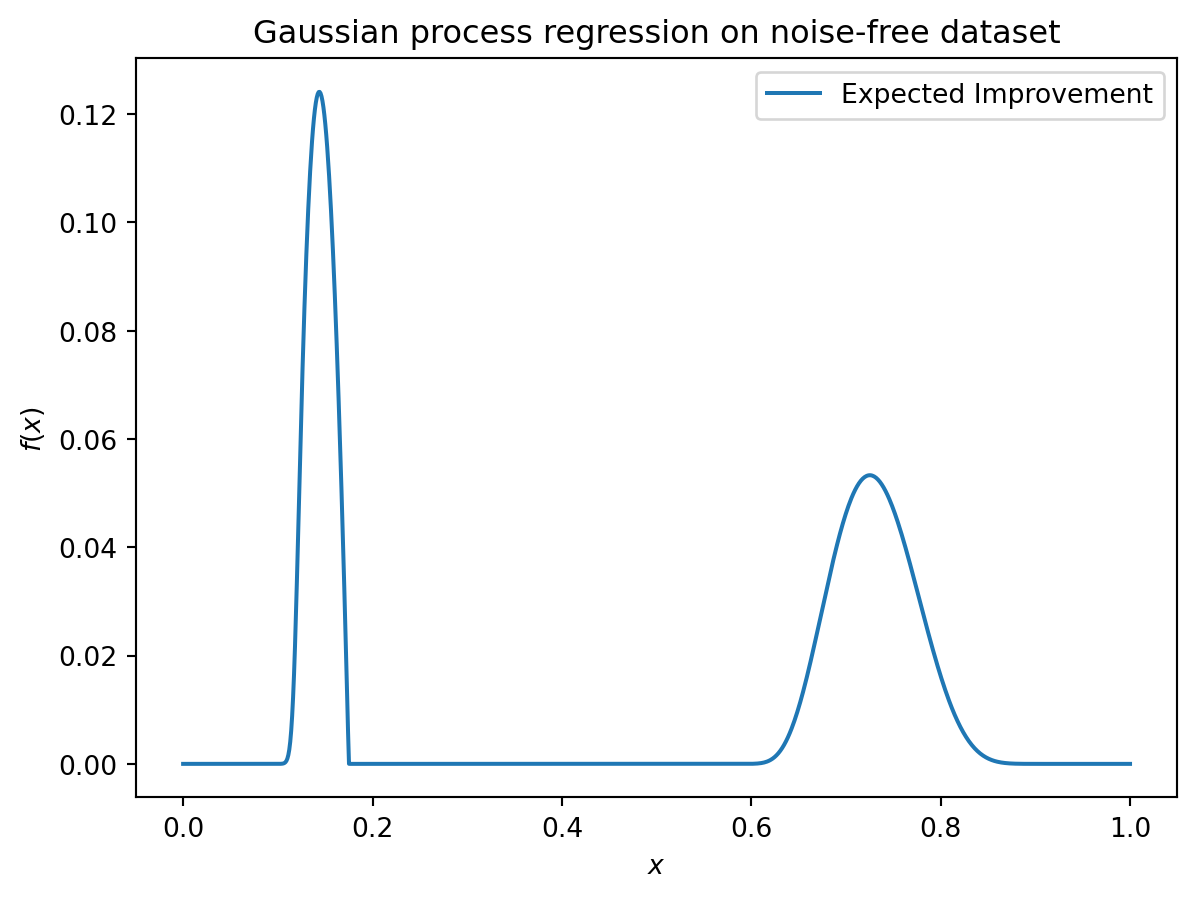

In [47]:
#plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
# plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, -ei, label="Expected Improvement")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

## Noise


Seed set to 123


[[ 0.63529627]
 [-4.10764204]
 [-0.44071975]
 [ 9.63125638]
 [-8.3518118 ]
 [-3.62418901]
 [ 4.15331   ]
 [ 3.4468512 ]
 [ 6.36049088]
 [-7.77978539]]
[-1.57464135 16.13714981  2.77008442 93.14904827 71.59322218 14.28895359
 15.9770567  12.96468767 39.82265329 59.88028242]


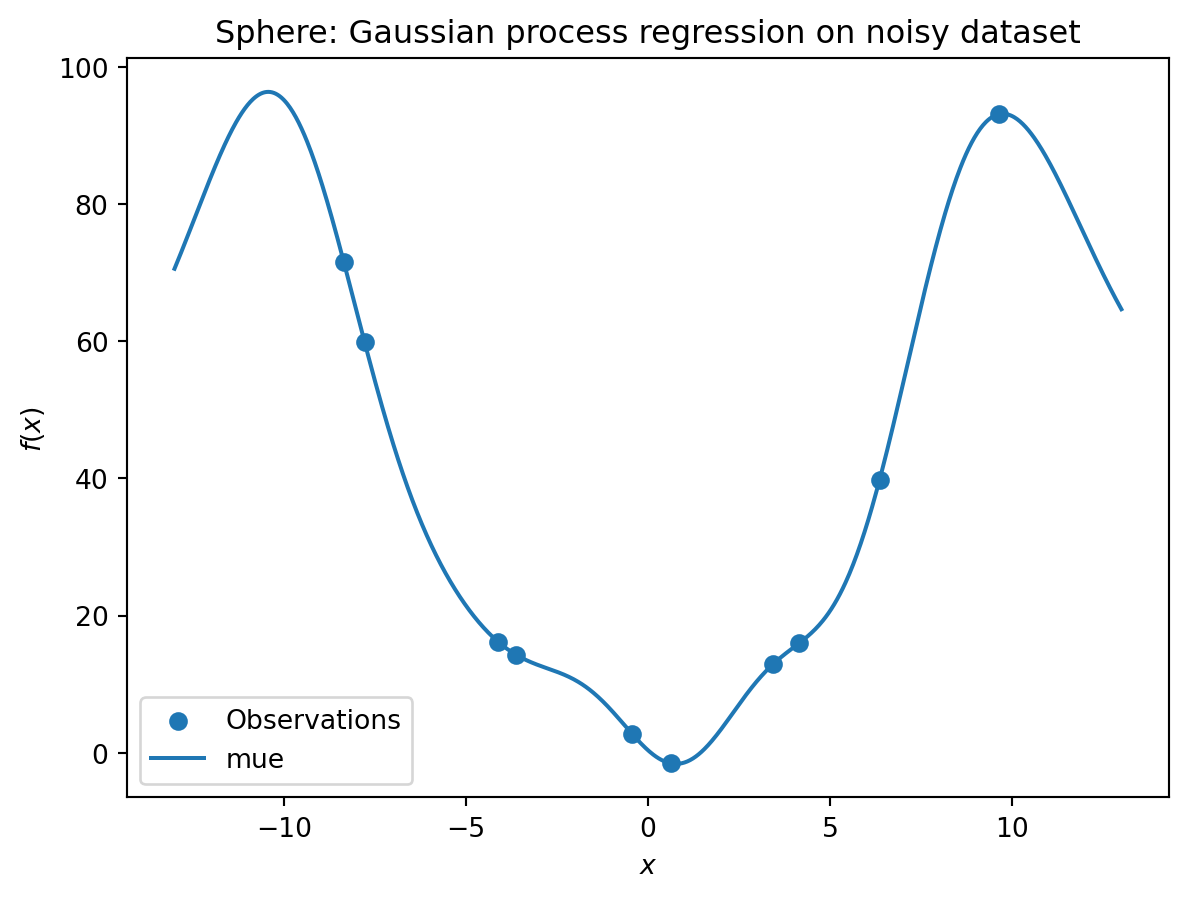

In [48]:
import numpy as np
import spotpython
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.design.spacefilling import SpaceFilling
from spotpython.build.kriging import Kriging
import matplotlib.pyplot as plt

gen = SpaceFilling(1)
rng = np.random.RandomState(1)
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_sphere
fun_control = fun_control_init(
    PREFIX="07_Y",
    sigma=2.0,
    seed=123,)
X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)
y.shape
X_train = X.reshape(-1,1)
y_train = y

S = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=False)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

#plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Sphere: Gaussian process regression on noisy dataset")

In [49]:
S.log

{'negLnLike': array([26.18505386]),
 'theta': array([-1.10547468]),
 'p': [],
 'Lambda': []}

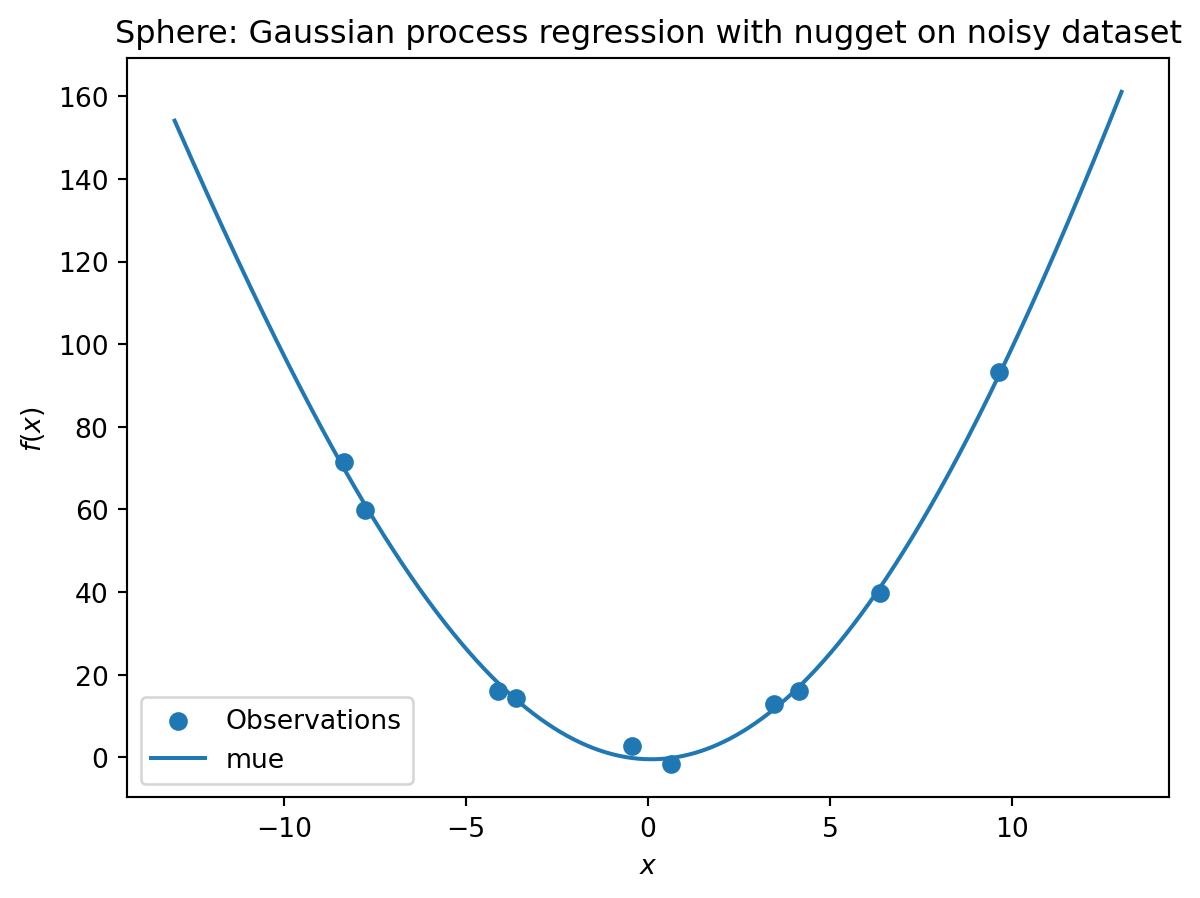

In [50]:
S = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=True)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

#plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Sphere: Gaussian process regression with nugget on noisy dataset")

In [51]:
S.log

{'negLnLike': array([21.82276721]),
 'theta': array([-2.94197609]),
 'p': [],
 'Lambda': array([4.89634048e-05])}

## Cubic Function


Seed set to 123


[[ 0.63529627]
 [-4.10764204]
 [-0.44071975]
 [ 9.63125638]
 [-8.3518118 ]
 [-3.62418901]
 [ 4.15331   ]
 [ 3.4468512 ]
 [ 6.36049088]
 [-7.77978539]]
[ 2.56406437e-01 -6.93071067e+01 -8.56027124e-02  8.93405931e+02
 -5.82561927e+02 -4.76028022e+01  7.16445311e+01  4.09512920e+01
  2.57319028e+02 -4.70871982e+02]


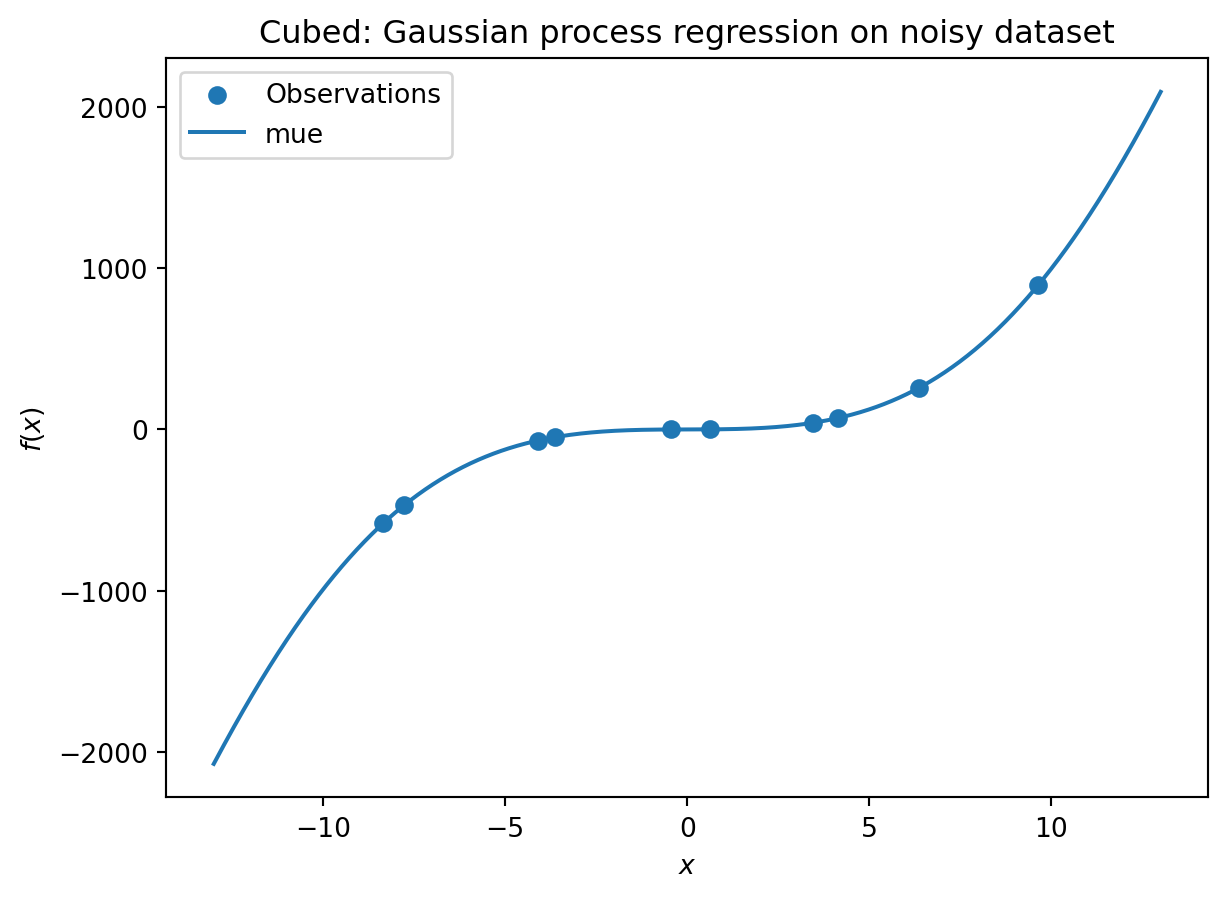

In [52]:
import numpy as np
import spotpython
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.design.spacefilling import SpaceFilling
from spotpython.build.kriging import Kriging
import matplotlib.pyplot as plt

gen = SpaceFilling(1)
rng = np.random.RandomState(1)
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_cubed
fun_control = fun_control_init(
    PREFIX="07_Y",
    sigma=10.0,
    seed=123,)

X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)
y.shape
X_train = X.reshape(-1,1)
y_train = y

S = Kriging(name='kriging',  seed=123, log_level=50, n_theta=1, noise=False)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Cubed: Gaussian process regression on noisy dataset")

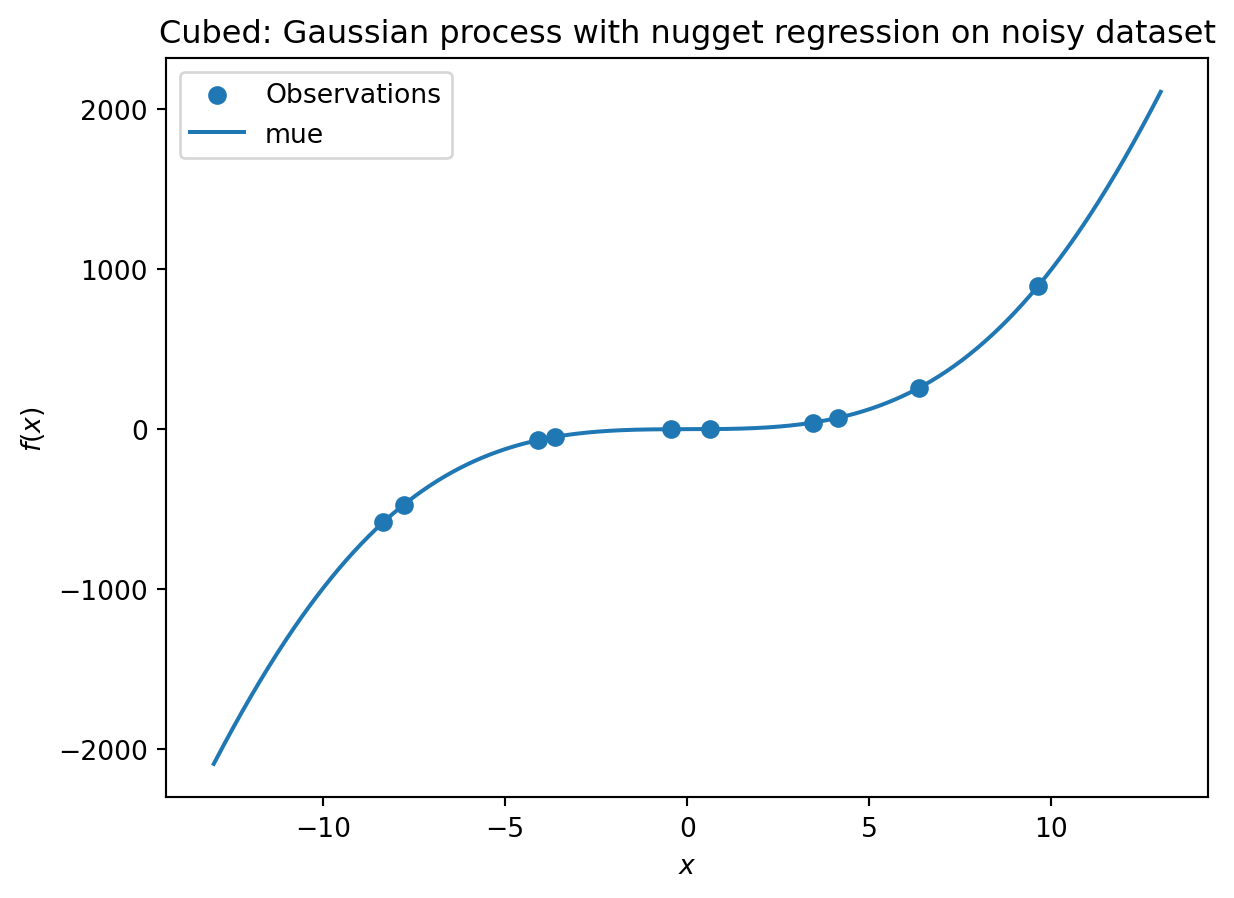

In [53]:
S = Kriging(name='kriging',  seed=123, log_level=0, n_theta=1, noise=True)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Cubed: Gaussian process with nugget regression on noisy dataset")

Seed set to 123


[[ 0.63529627]
 [-4.10764204]
 [-0.44071975]
 [ 9.63125638]
 [-8.3518118 ]
 [-3.62418901]
 [ 4.15331   ]
 [ 3.4468512 ]
 [ 6.36049088]
 [-7.77978539]]
[0.712453   0.05595118 0.83735691 0.0106654  0.01413372 0.07074765
 0.05479457 0.07763503 0.02412205 0.01625354]


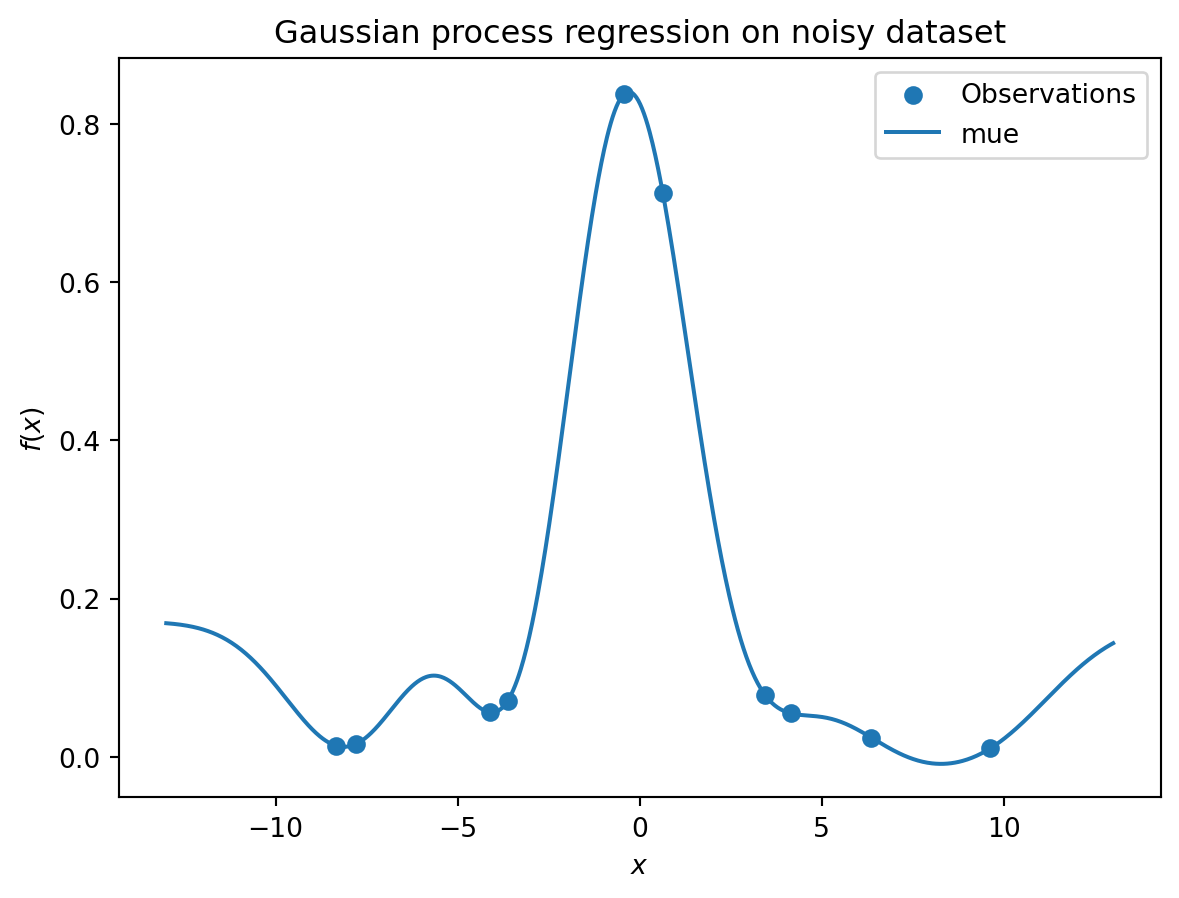

In [54]:
import numpy as np
import spotpython
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.design.spacefilling import SpaceFilling
from spotpython.build.kriging import Kriging
import matplotlib.pyplot as plt

gen = SpaceFilling(1)
rng = np.random.RandomState(1)
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_runge
fun_control = fun_control_init(
    PREFIX="07_Y",
    sigma=0.25,
    seed=123,)

X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)
y.shape
X_train = X.reshape(-1,1)
y_train = y

S = Kriging(name='kriging',  seed=123, log_level=50, n_theta=1, noise=False)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noisy dataset")

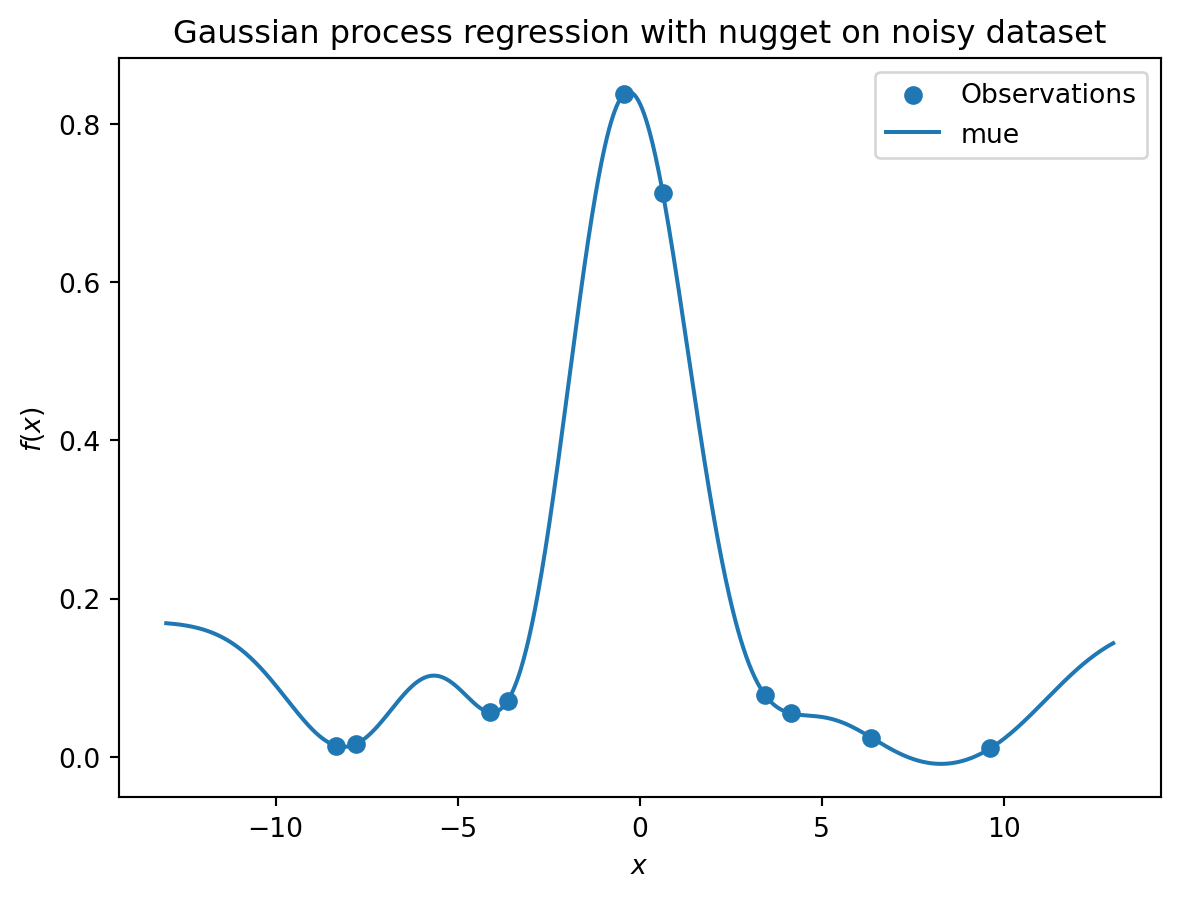

In [55]:
S = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=True)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression with nugget on noisy dataset")

## Modifying Lambda Search Space


In [56]:
S = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=True,
            min_Lambda=0.1,
            max_Lambda=10)
S.fit(X_train, y_train)

print(f"Lambda: {S.Lambda}")

Lambda: 0.1


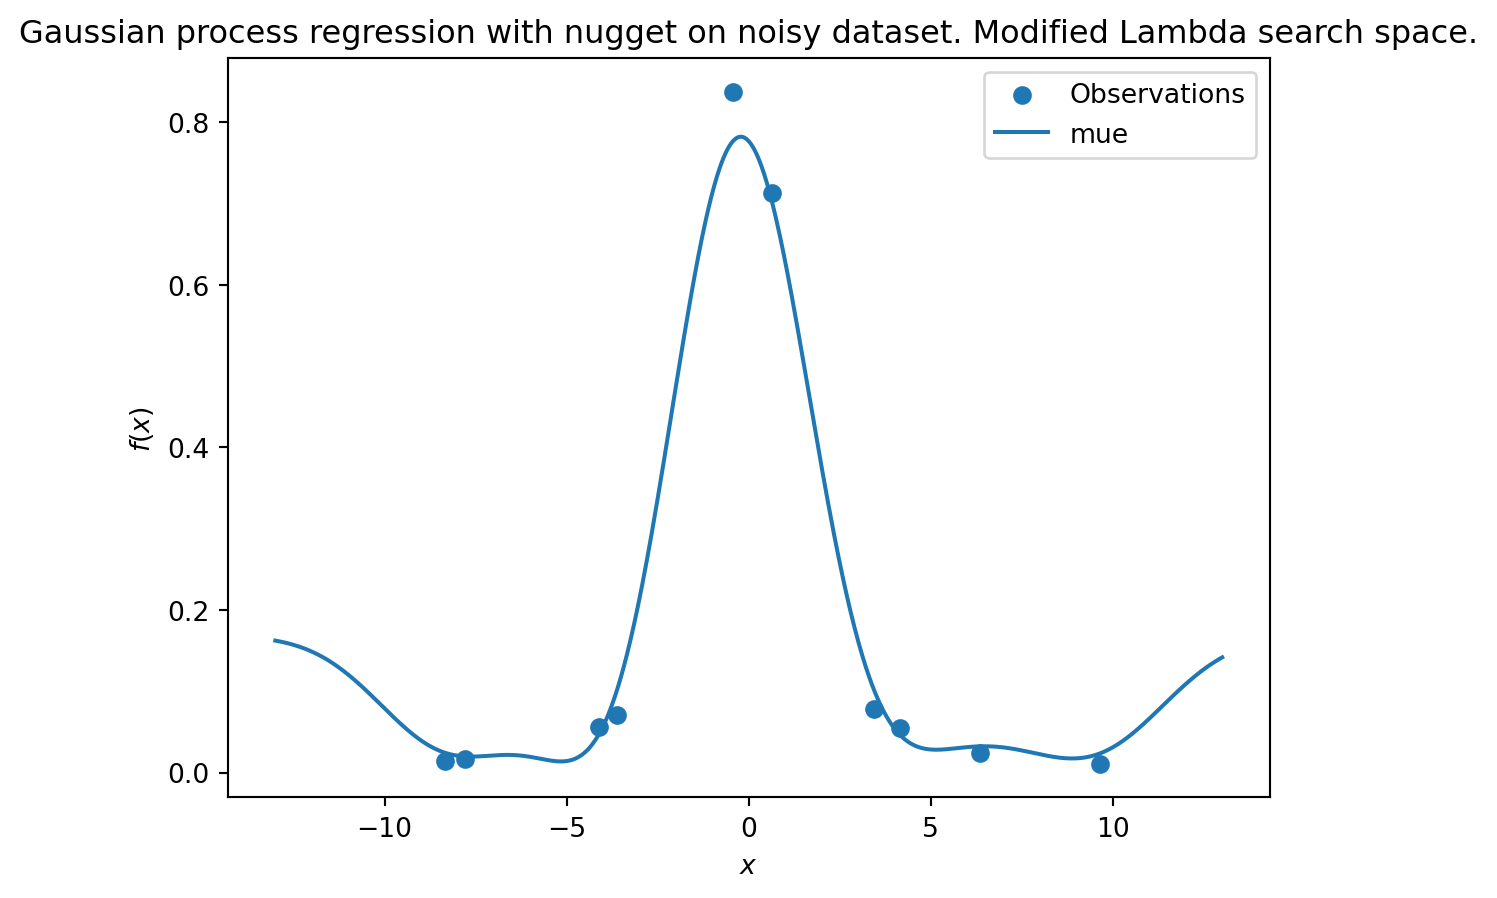

In [57]:
X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, ei, label="Expected Improvement")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression with nugget on noisy dataset. Modified Lambda search space.")